In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ЗАДАЧА КРАТКО: сегментировать клиентов банка по таблице с большим числом пропущенных значений

In [132]:
data=pd.read_csv("bank_client.csv")

# РАБОТА КОМАНДЫ:заполнение значений

In [133]:
data=data.drop("Id",axis=1)
data["Avg_num_delay"] = data["Avg_num_delay"].fillna(data["Avg_num_delay"].mean())
data["If_zalog"] = data["If_zalog"].fillna(0)
data["Num_account_active_180"] = data["Num_account_active_180"].fillna(0)
data["Active_to_all_prc"] = data["Active_to_all_prc"].fillna(data["Active_to_all_prc"].mean())
data["Num_account_active_all"] = data["Num_account_active_all"].fillna(data["Num_account_active_all"].mean())

data['Num_account_closed'] = data['Num_account_closed'].fillna(data['Num_account_closed'].mean())
data['Sum_of_paym_months'] = data['Sum_of_paym_months'].fillna(data['Sum_of_paym_months'].median())
data['All_credits'] = data['All_credits'].fillna(data['All_credits'].median())
data['Active_not_cc'] = data['Active_not_cc'].fillna(data['Active_not_cc'].median())
data['Own_closed'] = data['Own_closed'].fillna(data['Own_closed'].median())
data['Min_mnth_after_loan'] = data['Min_mnth_after_loan'].fillna(data['Min_mnth_after_loan'].median())
data['Max_mnth_after_loan'] = data['Max_mnth_after_loan'].fillna(data['Max_mnth_after_loan'].median())
data['Dlq_exist'] = data['Dlq_exist'].fillna(data['Dlq_exist'].mean())
data['Ninety_vintage'] = data['Ninety_vintage'].fillna(data['Ninety_vintage'].mean())

data.age = data.age.fillna(data.age.mean())
data.Max_90_days = data.Max_90_days.fillna(data.Max_90_days.mode()[0])
data.Empl_property = data.Empl_property.fillna(data.Empl_property.value_counts().index[0])
data.Empl_form = data.Empl_form.fillna(data.Empl_form.value_counts().index[0])
data.Family_status = data.Family_status.fillna(data.Family_status.value_counts().index[0])

data = data.fillna({'Empl_type': 'другое', 'Empl_size': '*n.a.*', 'Period_at_work': data['Period_at_work'].median()})

data = data.dropna()

In [134]:
#data=pd.get_dummies(data)

In [135]:
data

,Income_base_type,Credit_purpose,Insurance_flag,DTI,Sex,Full_age_child_number,Education,Empl_type,Empl_size,Period_at_work,...,Num_account_active_all,Num_account_closed,Sum_of_paym_months,All_credits,Active_not_cc,Own_closed,Min_mnth_after_loan,Max_mnth_after_loan,Dlq_exist,Ninety_vintage
0,Форма банка (без печати работодателя),Ремонт,1.0,0.59,мужской,0,среднее-специальное,менеджер высшего звена,< 50,100.0,...,2.2013,3.55405,62.0,5.0,1.0,0.0,9.0,67.0,0.585207,0.01761
1,2НДФЛ,Ремонт,1.0,0.55,мужской,0,высшее,специалист,>250,29.0,...,4.0000,3.00000,87.0,7.0,3.0,0.0,7.0,74.0,1.000000,0.00000
2,2НДФЛ,Ремонт,1.0,0.23,женский,1,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>=50,44.0,...,2.2013,3.55405,62.0,5.0,1.0,0.0,9.0,67.0,0.585207,0.01761
3,Свободная форма с печатью работодателя,Покупка земли,0.0,0.32,мужской,0,второе высшее,менеджер среднего звена,< 50,63.0,...,2.2013,3.55405,62.0,5.0,1.0,0.0,9.0,67.0,0.585207,0.01761
4,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,высшее,специалист,>250,106.0,...,4.0000,2.00000,134.0,6.0,2.0,1.0,13.0,91.0,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,Поступление зарплаты на счет,Другое,0.0,0.41,мужской,0,Высшее/Второе высшее/Ученая степень,специалист,>250,93.0,...,1.0000,4.00000,52.0,5.0,0.0,0.0,21.0,98.0,0.000000,0.00000
10238,Поступление зарплаты на счет,Ремонт,1.0,0.56,мужской,0,Высшее/Второе высшее/Ученая степень,специалист,>250,54.0,...,3.0000,0.00000,39.0,3.0,1.0,0.0,6.0,34.0,0.000000,0.00000
10239,2НДФЛ,Ремонт,0.0,0.21,мужской,0,высшее,специалист,>250,11.0,...,2.2013,3.55405,62.0,5.0,1.0,0.0,9.0,67.0,0.585207,0.01761
10240,2НДФЛ,Ремонт,1.0,0.49,женский,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,>=50,44.0,...,2.2013,3.55405,62.0,5.0,1.0,0.0,9.0,67.0,0.585207,0.01761


In [136]:
data.info

<bound method DataFrame.info of                              Income_base_type Credit_purpose  Insurance_flag  \
0       Форма банка (без печати работодателя)         Ремонт             1.0   
1                                       2НДФЛ         Ремонт             1.0   
2                                       2НДФЛ         Ремонт             1.0   
3      Свободная форма с печатью работодателя  Покупка земли             0.0   
4                Поступление зарплаты на счет         Ремонт             0.0   
...                                       ...            ...             ...   
10237            Поступление зарплаты на счет         Другое             0.0   
10238            Поступление зарплаты на счет         Ремонт             1.0   
10239                                   2НДФЛ         Ремонт             0.0   
10240                                   2НДФЛ         Ремонт             1.0   
10241   Форма банка (без печати работодателя)         Ремонт             0.0   

       

# МОЯ РАБОТА: кластеризация данных

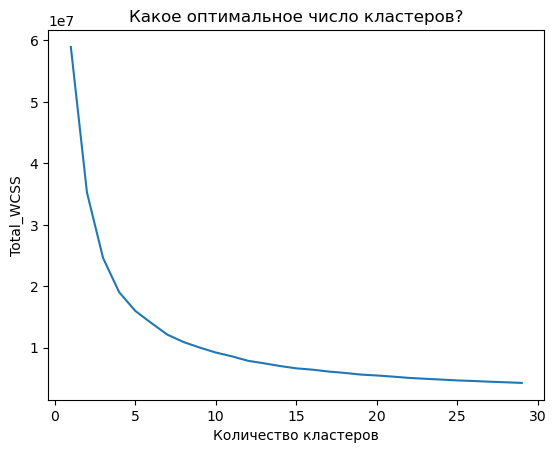

In [137]:
data=pd.get_dummies(data)
data = data.fillna(0)
# определяем необходимое количество кластеров
from sklearn.cluster import KMeans
total_wcss=[]
n_clusters = 30

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(data)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('Какое оптимальное число кластеров?')
plt.xlabel('Количество кластеров')
plt.ylabel('Total_WCSS')
plt.show()

kmeans = KMeans(n_clusters = 7) #введем сами
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
data["Group"]=y_kmeans


Методом локтя мы выяснили, что оптимальное разделение будет при 7 кластерах так как в таком пункте наблюдается последнее значительное уменьшение значения Total_WCSS

In [138]:
data.groupby(["Group"]).agg({"Group":"count"})

,Group
Group,
0,1035
1,5673
2,219
3,723
4,180
5,1597
6,675


НЕДОСТАТОК РАБОТЫ: не было проведено исследования датасета, не были рассмотрены параметры и что они означают(тк на кейс давалось всего 1.5 часа - лишь бы успеть выполнить задачу:) )

При использовании, например, рещающего дерева, мы бы могли понять наиболее важные ключевые фичи датасета

В качестве "таргетов" я решил использовать полученные с помощью k-means значения. Это далеко не лучший вариант, но пока что я умею и знаю лишь такой способ. Я могу на это пойти, так как алгоритм работает довольно точно, выдавая каждой группе +- 20 лишних пользователей. Это связано с тем, что в датасете действительно 7 разных группы клиентов (это было обговорено организаторами и этих результатов добились мы)

In [139]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [140]:
X=data.drop(["Group"],axis=1)
y=data.Group

In [141]:
X=pd.get_dummies(X)

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,
                                               random_state=0)

In [143]:
parametrs={'criterion': ['entropy'], 'max_depth': range(1,4)}

In [144]:
clf=tree.DecisionTreeClassifier()

In [145]:
grid_search_cv_clf=GridSearchCV(clf,parametrs, cv=5)

Отберем лучшую модель по параметрам выше и с помощью кросс валидации на 5 частей

In [146]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 4)})

In [147]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [169]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [170]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [171]:
best_clf.score(X_test,y_test)

0.9439112177564487

In [172]:
X_train.head(10)

,Insurance_flag,DTI,Full_age_child_number,Period_at_work,age,Max_90_days,Avg_num_delay,If_zalog,Num_account_active_180,Active_to_all_prc,...,Empl_form_Иная форма,Empl_form_Индивидуальный предприниматель,Empl_form_ОАО,Empl_form_ООО,Family_status_вдовец / вдова,Family_status_гражданский брак,Family_status_женат / замужем,Family_status_повторный брак,Family_status_разведен / разведена,Family_status_холост / не замужем
7960,1.0,0.13,0,14.0,26.000000,1.0,0.000000,1.0,2.0,0.400000,...,0,0,0,0,0,0,0,0,0,1
2686,1.0,0.21,1,30.0,30.000000,2.0,0.063989,0.0,0.0,0.419945,...,0,0,1,0,0,0,1,0,0,0
4589,0.0,0.42,0,33.0,35.000000,1.0,0.063989,0.0,0.0,0.419945,...,0,0,0,1,0,0,1,0,0,0
2139,1.0,0.59,0,49.0,47.000000,1.0,0.063989,0.0,0.0,0.419945,...,0,0,0,1,0,0,1,0,0,0
8662,1.0,0.55,1,9.0,46.000000,6.0,0.293333,0.0,1.0,0.076923,...,0,0,1,0,0,0,1,0,0,0
7605,1.0,0.36,0,37.0,25.000000,1.0,0.063989,0.0,0.0,0.419945,...,0,0,0,1,0,0,1,0,0,0
10109,1.0,0.59,0,44.0,36.245255,1.0,0.063989,0.0,0.0,0.419945,...,0,0,0,1,0,0,1,0,0,0
651,1.0,0.46,1,49.0,51.000000,0.0,0.000000,0.0,1.0,1.000000,...,0,0,0,1,0,0,1,0,0,0
153,0.0,0.40,0,44.0,36.245255,1.0,0.063989,0.0,0.0,0.419945,...,0,0,0,1,0,0,1,0,0,0
4633,1.0,0.32,1,42.0,27.000000,1.0,0.000000,0.0,0.0,1.000000,...,0,0,0,1,0,0,1,0,0,0


In [173]:
y_pred=best_clf.predict_proba(X_test)

In [174]:
y_pred

array([[5.09554140e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.46314832e-01, 9.09918107e-04],
       [0.00000000e+00, 4.02843602e-02, 1.56398104e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.03317536e-01],
       [0.00000000e+00, 4.02843602e-02, 1.56398104e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.03317536e-01],
       ...,
       [9.68013468e-01, 3.19865320e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.57894737e-01, ...,
        0.00000000e+00, 1.68421053e-01, 5.63157895e-01],
       [1.68918919e-03, 9.97184685e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.12612613e-03, 0.00000000e+00]])

[Text(0.5, 0.875, 'X[3] <= 64.5\nentropy = 1.969\nsamples = 6768\nvalue = [701, 3819, 146, 460, 116, 1079, 447]'),
 Text(0.25, 0.625, 'X[12] <= 58.5\nentropy = 1.024\nsamples = 4874\nvalue = [645, 3819, 66, 0, 0, 5, 339]'),
 Text(0.125, 0.375, 'X[17] <= 46.5\nentropy = 0.879\nsamples = 900\nvalue = [639, 260, 0, 0, 0, 1, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.204\nsamples = 594\nvalue = [575, 19, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.77\nsamples = 306\nvalue = [64, 241, 0, 0, 0, 1, 0]'),
 Text(0.375, 0.375, 'X[12] <= 101.5\nentropy = 0.568\nsamples = 3974\nvalue = [6, 3559, 66, 0, 0, 4, 339]'),
 Text(0.3125, 0.125, 'entropy = 0.031\nsamples = 3552\nvalue = [6, 3542, 0, 0, 0, 4, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.859\nsamples = 422\nvalue = [0, 17, 66, 0, 0, 0, 339]'),
 Text(0.75, 0.625, 'X[3] <= 137.5\nentropy = 1.785\nsamples = 1894\nvalue = [56, 0, 80, 460, 116, 1074, 108]'),
 Text(0.625, 0.375, 'X[12] <= 103.5\nentropy = 0.923\nsamples = 1289\nvalue = [56, 0, 49,

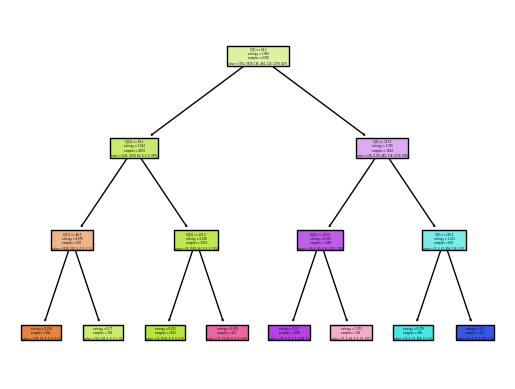

In [175]:
tree.plot_tree(best_clf,filled=True)

Судя по дереву, наиболее важен 3ий параметр, также важны 12 и 17

In [176]:
data.iloc[:,[3,12,17]].head(5)

,Period_at_work,Sum_of_paym_months,Max_mnth_after_loan
0,100.0,62.0,67.0
1,29.0,87.0,74.0
2,44.0,62.0,67.0
3,63.0,62.0,67.0
4,106.0,134.0,91.0


Судя по всему, это и есть 3 основные фичи, по которым распределяются люди на группы.

Но до этого я также получал другим методом значения [1, 11], в которых фигурировал коэф-нт DTI - отношение долга к доходам, и я считаю что это более правдоподобный параметротбора, потому что период на работе (видимо, стаж) вряд ли так же важен как связь клиента с его долгами

Вывод по работе: Я сегментировал клиентов банка и выявил основные параметры для разделения, воспользовавшись k-means и DecisionTree